<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JavierP-rez/blob/main/Semana8_02to08Nov/Actividad%20Semanal_7RegresionesKmeans/NotebookRegresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal -- 7 Regresiones y K means



---



---

* Nombre:
  * Javier Pérez Sanagustín

* Matrícula:
  * A01794233

Materia:

> Ciencia y analítica de datos (Gpo 10)

Profesora titular: María de la Paz Rico Fernández

Profesor tutor: Bernardo Charles Canales

Fecha: 04 de noviembre del 2022





## Linear Models


---

* In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels.
* In regression, the labels are continuous quantities.
* Linear models predict by computing a weighted sum of input features plus a bias term.





In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [2]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

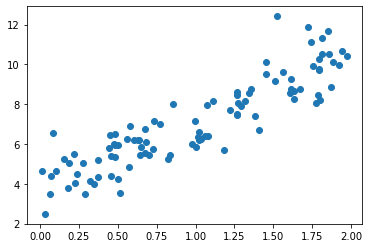

In [3]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [4]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [5]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

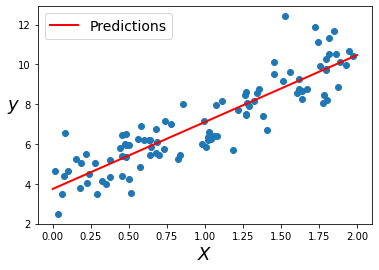

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 


This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

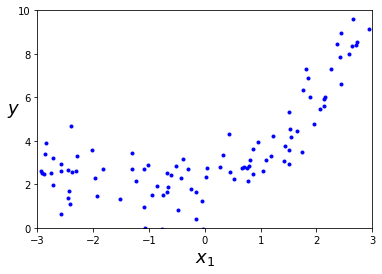

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
# import pandas as pd
# pd.DataFrame(y)

Now we can use PolynomialFeatues to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
# X_poly

X_poly now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])

[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

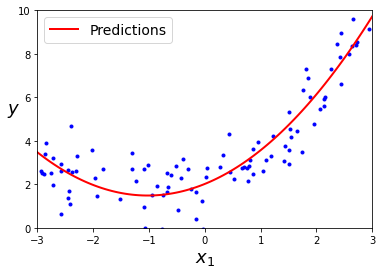

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [25]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

* Divide los datos del costo de manufactura. Utiliza la función train_test_split

    * Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=15)

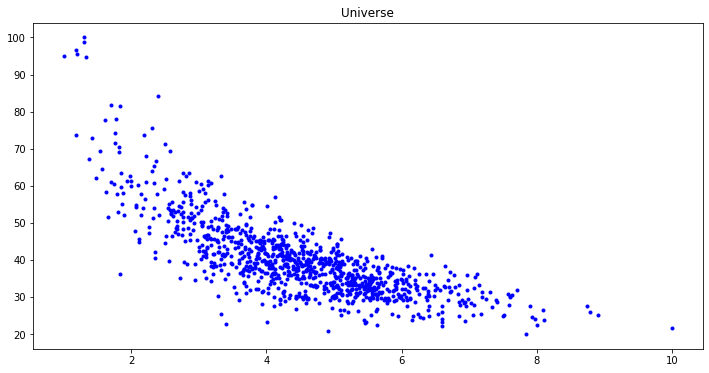

In [29]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(X.values,y,'b.')
plt.title('Universe', fontsize=12)
plt.show()

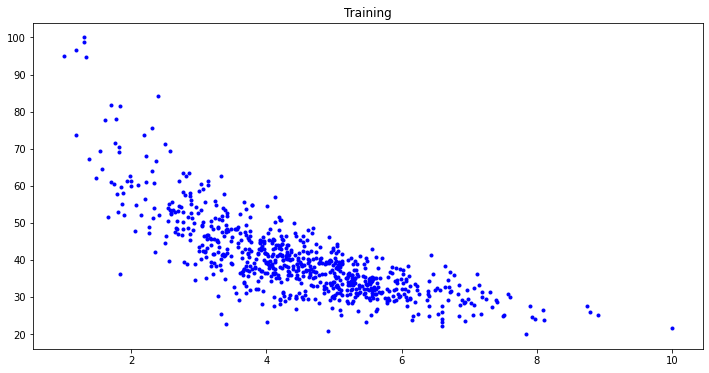

In [30]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(xtrain.values,ytrain,'b.')
plt.title('Training', fontsize=12)
plt.show()

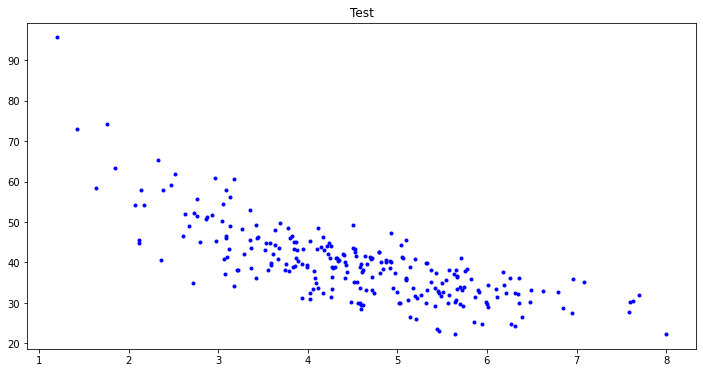

In [31]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(xtest.values,ytest,'b.')
plt.title('Test', fontsize=12)
plt.show()

* Regresión Lineal.

In [33]:
m = LinearRegression(fit_intercept=True)
m.fit(xtrain, ytrain)

LinearRegression()

In [37]:
xfit = np.linspace(0, xtest.values.max(), 250)
y_pred = m.predict(xtest)

print("Pendiente:    ", m.coef_[0])
print("Intercepción:", m.intercept_)

Pendiente:     -6.164520231187649
Intercepción: 67.69668548585642


La ecuación generada con regresión lineal se vería de la siguiente manera:

y = -6.164X + 67.696


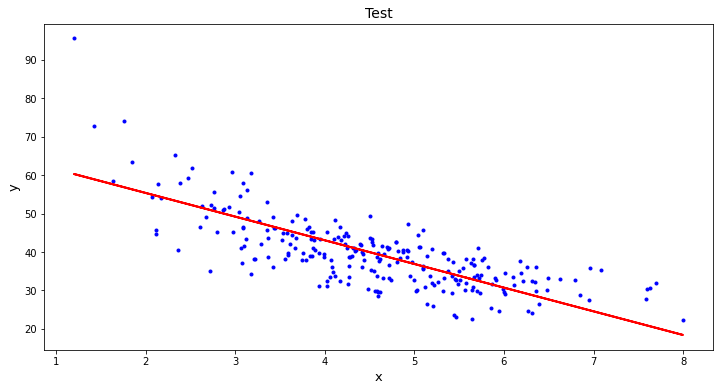

In [39]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(xtest.values,ytest,'b.')
plt.plot(xtest.values, y_pred, "r-", linewidth=2, label="Predictions")
plt.title('Test', fontsize=14)
plt.xlabel("x", fontsize=13)
plt.ylabel("y", rotation=90, fontsize=13)
plt.show()

In [41]:
mae = mean_absolute_error(ytest, y_pred)
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
r2_scoreval = r2_score(ytest, y_pred)
print('MAE:', round(mae, 3))
print('Root Mean Squared Error:', round(rmse, 3))
print('r2_score',round(r2_scoreval, 3))

MAE: 4.628
Root Mean Squared Error: 6.136
r2_score 0.564


* Regresión polinomial

Realiza la regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [43]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X.values)
xtrain_poly, xtest_poly, ytrain_poly, ytest_poly = train_test_split(X_poly, y, test_size=0.25, random_state=15)

In [44]:
model_poly = LinearRegression(fit_intercept=True)
model_poly.fit(xtrain_poly, ytrain_poly)

LinearRegression()

In [45]:
# y_pred = model.predict(poly_features.fit_transform(xtest.values))

In [47]:
print("Coeficientes:    ", model_poly.coef_)
print("Intercepción:", model_poly.intercept_)

Coeficientes:     [-17.03152209   1.1768465 ]
Intercepción: 90.57908242056516


La ecuación generada con regresión lineal polinomial se vería de la siguiente manera:

y = -17.03x + 1.17x2 + 90.57

In [48]:
X_new=np.linspace(xtest_poly[:,0].min(), xtest_poly[:,0].max(), xtest_poly[:,0].shape[0]).reshape(xtest_poly[:,0].shape[0], 1)
# X_new_poly = poly_features.transform(X_new)
# y_new = model_poly.predict(X_new_poly)
y_new = model_poly.predict(xtest_poly)

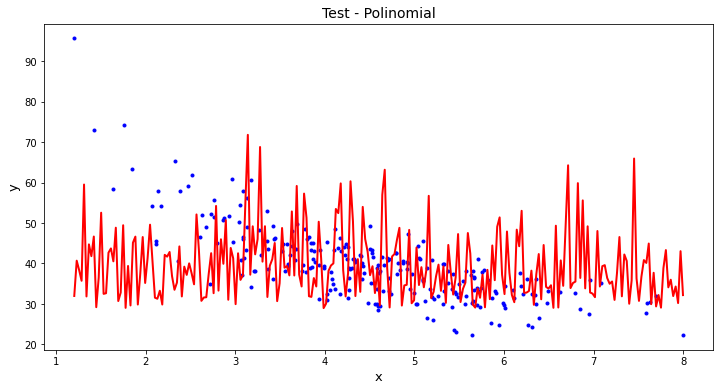

In [50]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(xtest_poly[:,0],ytest_poly,'b.')
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.title('Test - Polinomial', fontsize=14)
plt.xlabel("x", fontsize=13)
plt.ylabel("y", rotation=90, fontsize=13)
plt.show()

In [51]:
mae_poly = mean_absolute_error(ytest_poly, y_new)
rmse_poly = np.sqrt(mean_squared_error(ytest_poly, y_new))
r2_poly = r2_score(ytest_poly, y_new)
print('MAE:', round(mae_poly, 3))
print('Root Mean Squared Error Polinomial:', round(rmse_poly, 3))
print('r2_score Polinomial ',round(r2_poly, 3))

MAE: 4.36
Root Mean Squared Error Polinomial: 5.595
r2_score Polinomial  0.637


* Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.


Ridge

In [52]:
model_ridge = Ridge(alpha=0.3)
model_ridge.fit(xtrain, ytrain)

Ridge(alpha=0.3)

In [53]:
xfit = np.linspace(0, xtest.values.max(), 250)
y_pred_rigde = model_ridge.predict(xtest)

In [55]:
print("m:    ", model_ridge.coef_[0])
print("b:", model_ridge.intercept_)

m:     -6.1631855096315675
b: 67.69073761671514


La ecuación generada con regresión lineal Ridge se vería de la siguiente manera:

y = -6.164x + 67.69

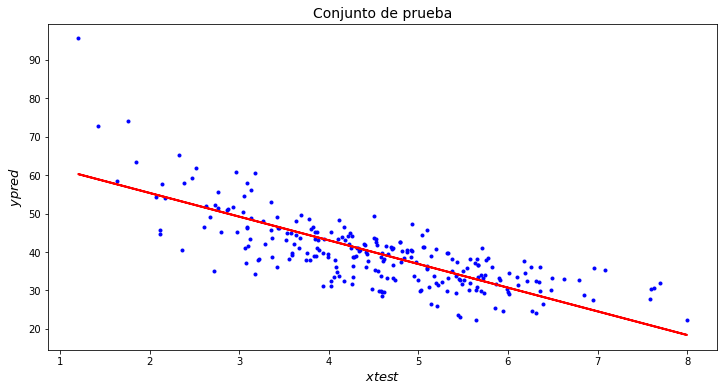

In [56]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(xtest.values,ytest,'b.')
plt.plot(xtest.values, y_pred_rigde, "r-", linewidth=2, label="Predictions")
plt.title('Conjunto de prueba', fontsize=14)
plt.xlabel("$xtest$", fontsize=13)
plt.ylabel("$ypred$", rotation=90, fontsize=13)
plt.show()

In [57]:
mae_ridge = mean_absolute_error(ytest, y_pred_rigde)
rmse_ridge = np.sqrt(mean_squared_error(ytest, y_pred_rigde))
r2_scoreval_ridge = r2_score(ytest, y_pred_rigde)
print('MAE:', round(mae_ridge, 3))
print('Root Mean Squared Error:', round(rmse_ridge, 3))
print('r2_score',round(r2_scoreval_ridge, 3))

MAE: 4.627
Root Mean Squared Error: 6.136
r2_score 0.564



Lasso

In [58]:
model_lasso = Lasso(alpha=0.7)
model_lasso.fit(xtrain, ytrain)

Lasso(alpha=0.7)

In [59]:
xfit = np.linspace(0, xtest.values.max(), 250)
y_pred_lasso = model_lasso.predict(xtest)

In [61]:
print("m:    ", model_lasso.coef_[0])
print("b", model_lasso.intercept_)

m:     -5.785533955423472
b 66.00782329260255


La ecuación generada con regresión lineal Lasso se vería de la siguiente manera:

y = -5.79x + 66.01

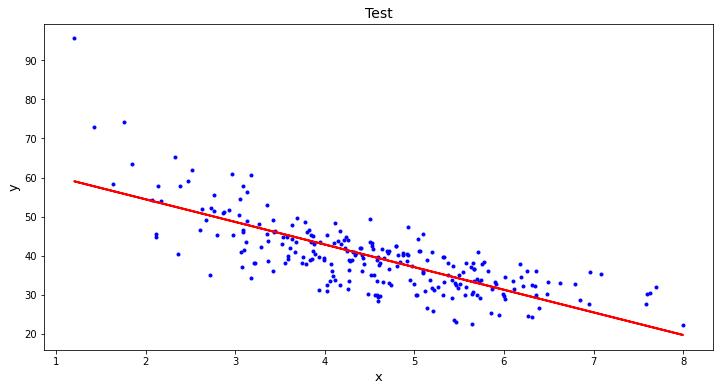

In [65]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(xtest.values,ytest,'b.')
plt.plot(xtest.values, y_pred_lasso, "r-", linewidth=2, label="Predictions")
plt.title('Test', fontsize=14)
plt.xlabel("x", fontsize=13)
plt.ylabel("y", rotation=90, fontsize=13)
plt.show()

In [66]:
mae_lasso = mean_absolute_error(ytest, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(ytest, y_pred_lasso))
r2_scoreval_lasso = r2_score(ytest, y_pred_lasso)
print('MAE:', round(mae_lasso, 3))
print('Root Mean Squared Error:', round(rmse_lasso, 3))
print('r2_score',round(r2_scoreval_lasso, 3))

MAE: 4.564
Root Mean Squared Error: 6.097
r2_score 0.569


* Gráficas.
  * MAE.
  * R2 

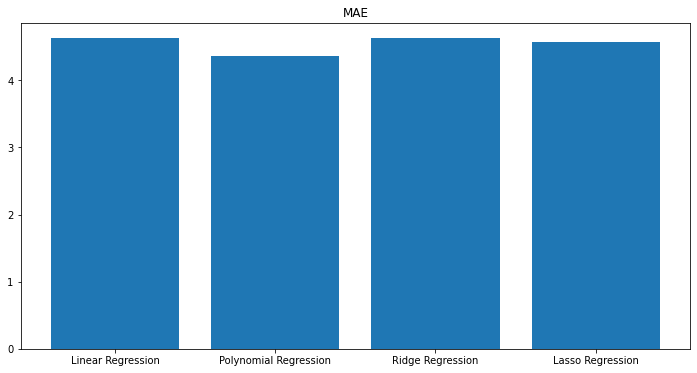

In [68]:
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression']
list_values = [mae, mae_poly, mae_ridge, mae_lasso]
axs.bar(list_names, list_values)
plt.title('MAE')
plt.show()

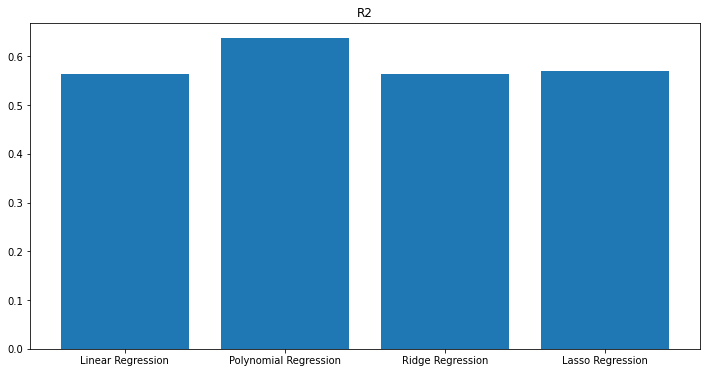

In [70]:
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression']
list_values = [r2_scoreval, r2_poly, r2_scoreval_ridge, r2_scoreval_lasso]
axs.bar(list_names, list_values)
plt.title('R2')
plt.show()

### Conclusiones. 



---


Se observó que con los tres métodos (regresión lineal, Ridge regresión y Lasso regression), no hay diferencia entre los resultados, por lo tanto solo tiene una variable predictoria. Y al aumentar el grado de la variable, a grado dos, se tiene una mayor precisión, por lo tanto se observa cantidad de detalle con el valor de 0.637.




# Ejercicio 2



---



---


Realiza la regresión polinomial de los siguientes datos:


In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [73]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [74]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

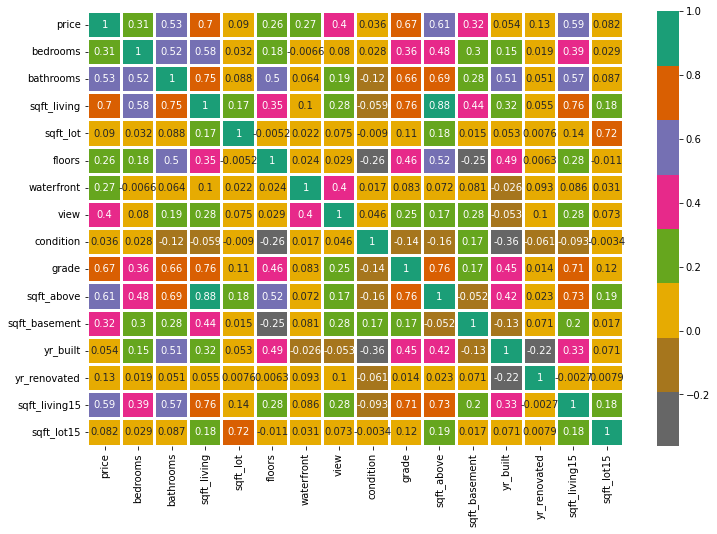

In [75]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [76]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

* Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print(f'Número total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


* Regresión Múltiple Lineal

In [78]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred = model.predict(X_test)
print("m:    ", model.coef_)
print("b:", model.intercept_)

m:     [[-3.82008048e+04  4.14661380e+04  1.07992584e+02  1.71356997e-02
   3.16916913e+04  5.52691023e+05  4.12493228e+04  2.12221443e+04
   1.19493216e+05  4.77750271e+01  6.02175565e+01 -3.55090216e+03
   1.32602215e+01  2.90059284e+01 -5.48132603e-01]]
b: [6151359.2627409]


La regresión lineal para el primer caso queda de la siguiente manera:

y = 6151359.26 - 3.82X_1 + 4.14X_2 + 107.9X_3 + 0.017X_4 + 31691.69X_5 + 555269.02X_6 + 41249.32X_7 + 21222.14X_8 + 119493.21X_9 +47.77X_10 + 60.02X_11 - 0.00355X_12 + 13.26X_13 + 29.01X_14 - 0.548X_15

In [82]:
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lr = r2_score(y_test, y_pred)
print('MAE:', round(mae_lr, 3))
print('Root Mean Squared Error:', round(rmse_lr, 3))
print('r2_score',round(r2_lr, 3))

MAE: 137480.139
Root Mean Squared Error: 232133.368
r2_score 0.658


* Regresión Múltiple Polinomial

In [83]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X.values)
xtrain_poly, xtest_poly, ytrain_poly, ytest_poly = train_test_split(X_poly, y, test_size=0.1, random_state=101)

In [84]:
model_poly = LinearRegression(fit_intercept=True)
model_poly.fit(xtrain_poly, ytrain_poly)

LinearRegression()

In [87]:
print("m:", model_poly.coef_)
print("b:", model_poly.intercept_)

m: [[ 9.33912834e+05 -1.09330730e+06 -4.56449932e+02 -2.78686288e+01
  -2.07407238e+06 -3.95431870e+06 -2.88638026e+05  5.58697570e+05
   1.09864510e+06 -2.19758415e+02 -3.82034272e+02 -8.59630908e+04
  -2.95351595e+03  3.99965710e+03 -3.40106316e+01  9.57541696e+02
   7.49958190e+03 -1.37969466e+01 -1.84926695e-02  8.57699569e+03
  -1.14965893e+04 -3.06588900e+02 -5.24628836e+03 -5.36788065e+03
  -1.20757669e+00 -1.46068182e+01 -4.67099451e+02 -9.13191519e+00
   1.72800642e+01  2.15500198e-01 -9.63429892e+03  1.53879172e+01
  -1.35842369e-01 -2.59067293e+04  4.33707238e+04  3.82942459e+03
  -1.07592927e+03  2.22971689e+04  1.44292325e+01  1.33928361e+00
   5.03401980e+02 -1.70798805e+01 -1.72895923e+01 -5.56785248e-02
   1.56185890e+00 -4.34972758e+00  4.83299456e+00  1.60303193e+02
  -1.42711737e+01  1.31138593e+01  2.07283397e+01  2.61335089e+00
  -4.41381412e+00 -2.20765903e+00  6.36282684e-02  3.53629072e+00
   1.88176819e+01  3.06637958e-07  4.40839907e-01 -9.84216136e-02
  -9.75

In [88]:
y_new = model_poly.predict(xtest_poly)
mae_poly = mean_absolute_error(ytest_poly, y_new)
rmse_poly = np.sqrt(mean_squared_error(ytest_poly, y_new))
r2_poly = r2_score(ytest_poly, y_new)
print('MAE:', round(mae_poly, 3))
print('Root Mean Squared Error Polinomial:', round(rmse_poly, 3))
print('r2_score Polinomial ',round(r2_poly, 3))

MAE: 121314.069
Root Mean Squared Error Polinomial: 186261.286
r2_score Polinomial  0.78


* Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

Ridge

In [90]:
model_ridge = Ridge(alpha=5)
model_ridge.fit(X_train, y_train)

Ridge(alpha=5)

In [91]:
print("m:", model_ridge.coef_)
print("b:", model_ridge.intercept_)

m: [[-3.82896171e+04  4.13914306e+04  1.08096090e+02  1.61486363e-02
   3.16788057e+04  5.31220189e+05  4.22492400e+04  2.12424198e+04
   1.19381757e+05  4.79302812e+01  6.01658037e+01 -3.54893952e+03
   1.35365987e+01  2.89064352e+01 -5.47487907e-01]]
b: [6148385.38096804]


In [93]:
y_pred_rigde = model_ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_rigde)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_rigde))
r2_scoreval_ridge = r2_score(y_test, y_pred_rigde)
print('MAE:', round(mae_ridge, 3))
print('Root Mean Squared Error:', round(rmse_ridge, 3))
print('r2_score',round(r2_scoreval_ridge, 3))

MAE: 137533.656
Root Mean Squared Error: 232291.888
r2_score 0.658


Lasso

In [94]:
model_lasso = Lasso(alpha=5, max_iter=100000)
model_lasso.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=5, max_iter=100000)

In [95]:
print("m:", model_lasso.coef_)
print("b:", model_lasso.intercept_)

m: [-3.81944532e+04  4.14447318e+04  2.91745187e+02  1.70981121e-02
  3.16689403e+04  5.51941446e+05  4.12775360e+04  2.12083740e+04
  1.19486323e+05 -1.35954221e+02 -1.23525585e+02 -3.55064163e+03
  1.32733439e+01  2.90029354e+01 -5.48149962e-01]
b: [6150963.51853761]


In [97]:
y_pred_lasso = model_lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_scoreval_lasso = r2_score(y_test, y_pred_lasso)
print('MAE:', round(mae_lasso, 3))
print('Root Mean Squared Error:', round(rmse_lasso, 3))
print('r2_score',round(r2_scoreval_lasso, 3))

MAE: 137482.302
Root Mean Squared Error: 232139.173
r2_score 0.658


* Gráficas.
  * MAE.
  * R2

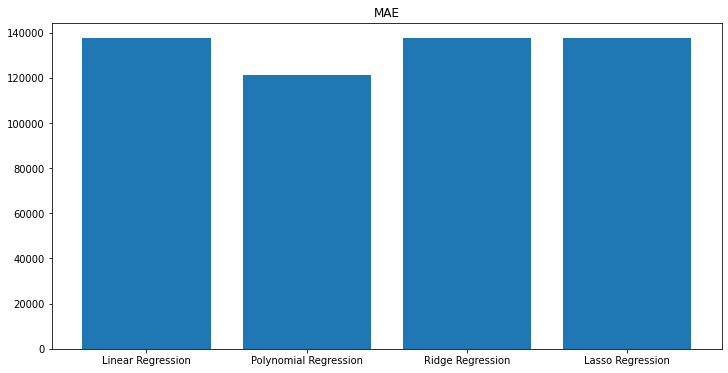

In [99]:
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression']
list_values = [mae_lr, mae_poly, mae_ridge, mae_lasso]
axs.bar(list_names, list_values)
plt.title('MAE')
plt.show()

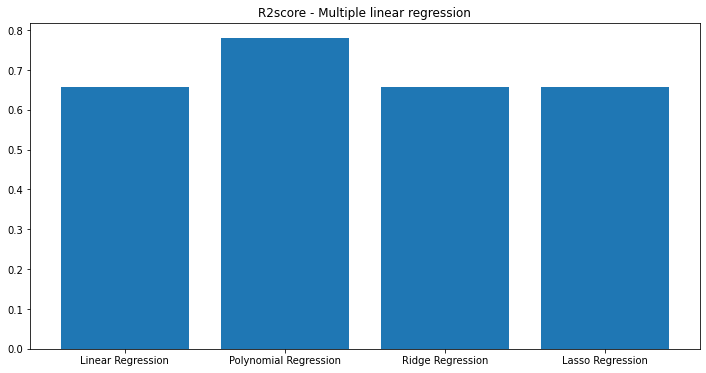

In [100]:
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression']
list_values = [r2_lr, r2_poly, r2_scoreval_ridge, r2_scoreval_lasso]
axs.bar(list_names, list_values)
plt.title('R2score - Multiple linear regression')
plt.show()

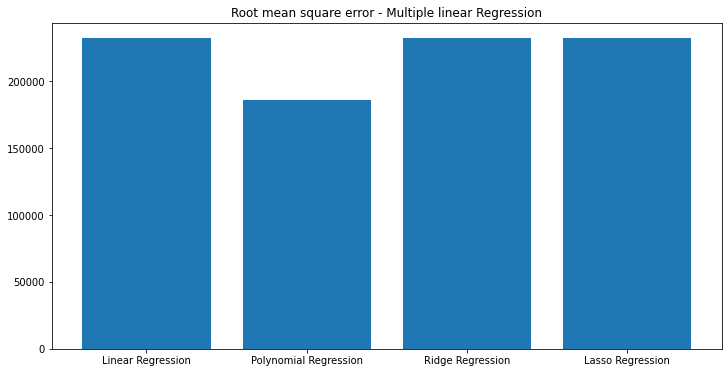

In [101]:
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression']
list_values = [rmse_lr, rmse_poly, rmse_ridge, rmse_lasso]
axs.bar(list_names, list_values)
plt.title('Root mean square error - Multiple linear Regression')
plt.show()

* Conclusión. 



---

Se observa la diferencia entre la regresión lineal y R2, es más preciso el método de R2, debido a que es posible que se acerque más a la curva, con los métodos polinomiales. Para este ejervicio, los valores no varían mucho, pero se puede distinguir más detallado el método polinomial. 
